In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Standardize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # n_clusters=3 because we know Iris has 3 species
clusters_kmeans = kmeans.fit_predict(df_scaled)

# Adding the K-Means cluster labels to the original DataFrame
df['KMeans_Cluster'] = clusters_kmeans
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),KMeans_Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


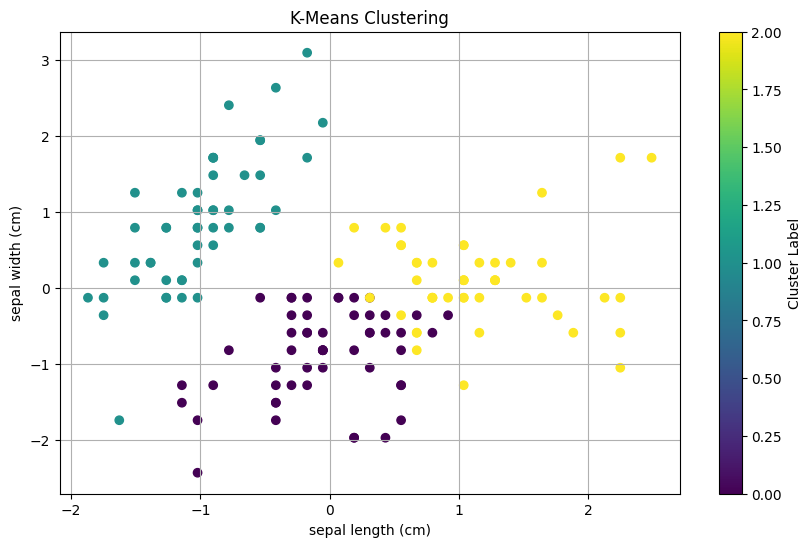

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters_kmeans, cmap='viridis', marker='o')
plt.title('K-Means Clustering')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

## Plot of the silhouette scores for different numbers of clusters:

**x-axis**: Represents the number of clusters tested (from 2 to 10).

**y-axis**: Shows the silhouette score for each number of clusters.

Plot helps identify the optimal number of clusters by finding where the silhouette score is highest. we will select where the number of clusters with the best score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

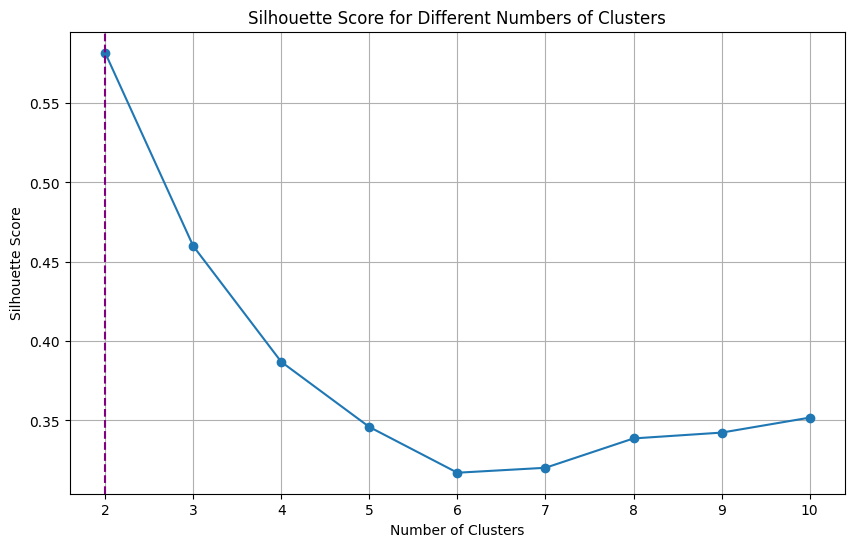

In [7]:
from sklearn.metrics import silhouette_score

# List to store silhouette scores for different numbers of clusters
silhouette_scores = []
cluster_range = range(2, 11)  # We will test for clusters from 2 to 10

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, clusters)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')

# Draw a vertical line, where the best model is
# Plotting the silhouette scores with a vertical line to indicate the best cluster number
best_cluster_num = cluster_range[np.argmax(silhouette_scores)]
plt.axvline(x=best_cluster_num, color='purple', linestyle='--',
            label=f'Optimal Clusters: {best_cluster_num}')


plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


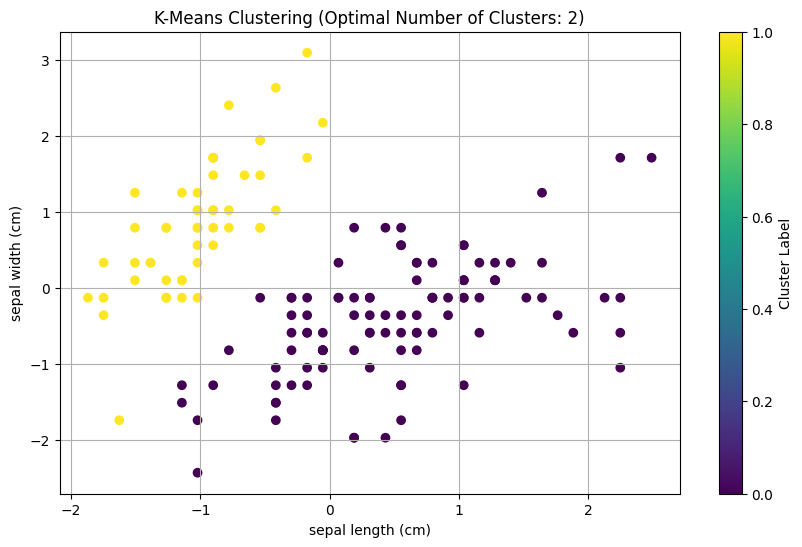

In [8]:
# Apply K-Means clustering with the best number of clusters
kmeans_best = KMeans(n_clusters=best_cluster_num, random_state=42)
clusters_best = kmeans_best.fit_predict(df_scaled)

# Scatter plot of the K-Means clusters with the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters_best, cmap='viridis', marker='o')
plt.title(f'K-Means Clustering (Optimal Number of Clusters: {best_cluster_num})')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()
